Download Data from Kaggle

In [1]:
from google.colab import drive
drive.mount('/content/drive')

%cd drive/MyDrive/

Mounted at /content/drive
/content/drive/MyDrive


In [2]:
! pip install -q kaggle

# from google.colab import files
# files.upload()

In [3]:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

! chmod 600 ~/.kaggle/kaggle.json

! kaggle datasets download -d adityajn105/flickr8k

!unzip \*.zip

Streaming output truncated to the last 5000 lines.
  inflating: Images/2844846111_8c1cbfc75d.jpg  
  inflating: Images/2844963839_ff09cdb81f.jpg  
  inflating: Images/2845246160_d0d1bbd6f0.jpg  
  inflating: Images/2845691057_d4ab89d889.jpg  
  inflating: Images/2845845721_d0bc113ff7.jpg  
  inflating: Images/2846037553_1a1de50709.jpg  
  inflating: Images/2846785268_904c5fcf9f.jpg  
  inflating: Images/2846843520_b0e6211478.jpg  
  inflating: Images/2847514745_9a35493023.jpg  
  inflating: Images/2847615962_c330bded6e.jpg  
  inflating: Images/2847859796_4d9cb0d31f.jpg  
  inflating: Images/2848266893_9693c66275.jpg  
  inflating: Images/2848571082_26454cb981.jpg  
  inflating: Images/2848895544_6d06210e9d.jpg  
  inflating: Images/2848977044_446a31d86e.jpg  
  inflating: Images/2849194983_2968c72832.jpg  
  inflating: Images/2850719435_221f15e951.jpg  
  inflating: Images/2851198725_37b6027625.jpg  
  inflating: Images/2851304910_b5721199bc.jpg  
  inflating: Images/2851931813_eaf8ed

In [4]:
import glob
import numpy as np
import pandas as pd

img_files = glob.glob('Images/*.jpg',recursive=True)
print(f'Total images in archive : {len(img_files)}')

Total images in archive : 8091


In [5]:
cap_df = pd.read_csv('captions.txt')
print(f'Total Captions in file : {cap_df.shape[0]}')
cap_df.head()

Total Captions in file : 40455


,image,caption
0,1000268201_693b08cb0e.jpg,A child in a pink dress is climbing up a set o...
1,1000268201_693b08cb0e.jpg,A girl going into a wooden building .
2,1000268201_693b08cb0e.jpg,A little girl climbing into a wooden playhouse .
3,1000268201_693b08cb0e.jpg,A little girl climbing the stairs to her playh...
4,1000268201_693b08cb0e.jpg,A little girl in a pink dress going into a woo...


In [6]:
from collections import defaultdict

image_path_to_caption = defaultdict(list)
for idx, row in cap_df.iterrows():
    caption = row.caption
    im_path = row['image'][:-4]
    image_path_to_caption[im_path].append(caption)
print(f"Total captions present in the dataset: {len(cap_df['caption'])}")
print(f"Total images present in the dataset: {len(img_files)}")

Total captions present in the dataset: 40455
Total images present in the dataset: 8091


In [7]:
image_path_to_caption['1000268201_693b08cb0e']

['A child in a pink dress is climbing up a set of stairs in an entry way .',
 'A girl going into a wooden building .',
 'A little girl climbing into a wooden playhouse .',
 'A little girl climbing the stairs to her playhouse .',
 'A little girl in a pink dress going into a wooden cabin .']

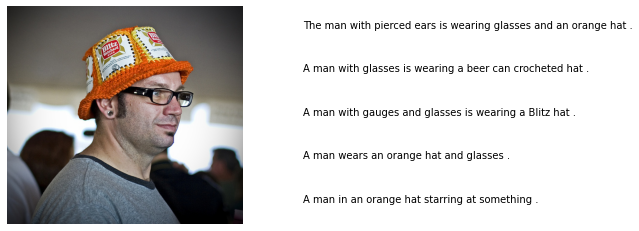

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import io

image_paths = list(image_path_to_caption.keys())
all_captions = []
img_name_vector = []
for image_path in image_paths:
    caption_list = image_path_to_caption[image_path]
    all_captions.extend(caption_list)
    img_name_vector.extend([image_path] * len(caption_list))

f, axes = plt.subplots(1, 2)
plt.axis('off')
f.set_figwidth(10)
image_num = 20
axes[0].imshow(io.imread('Images/' + img_name_vector[image_num] + '.jpg'))
axes[0].axis('off')
axes[1].set_ylim(0,5)
for i in range(image_num,image_num+5):
    axes[1].text(0,i+0.5-image_num,all_captions[i])

In [9]:
import string
import re

def preprocessing(my_dict):
    maxCapSize = 0
    for key, cap_list in my_dict.items():
        for i in range(len(cap_list)):
            cap = cap_list[i]
            cap = re.sub('[()!?]', ' ', cap)  # remove punctuations
            cap = re.sub('\[.*?\]',' ', cap)  # remove punctuations
            cap = re.sub("[^a-z0-9]"," ", cap)# non-alphanumeric characters
            cap = cap.split()
            cap = [word.lower() for word in cap]
            cap = [word for word in cap if len(word)>1]
            cap_list[i] =  ' '.join(cap)
            if(maxCapSize < len(cap)):
              maxCapSize = len(cap)
              maxCapKey = key
    print('Max number of words in captions = ', maxCapSize)
    return maxCapKey, maxCapSize

maxCapKey, maxCapSize = preprocessing(image_path_to_caption)

Max number of words in captions =  32


In [10]:
image_path_to_caption[maxCapKey]

['man holding money standing in front of street band and store',
 'man holds dollar bill in front of his face while posing in front of street band',
 'man holds money in the air',
 'man in green jacket is standing outside store holding some money in front of his face',
 'frican merican man wearing green sweatshirt and blue vest is holding up dollar bills in front of his face while standing on busy sidewalk in front of group of men playing instruments']

In [11]:
image_path_to_caption['1000268201_693b08cb0e']

['child in pink dress is climbing up set of stairs in an entry way',
 'girl going into wooden building',
 'little girl climbing into wooden playhouse',
 'little girl climbing the stairs to her playhouse',
 'little girl in pink dress going into wooden cabin']

In [12]:
# save captions for cash problem
lines = list()
for key, cap_list in image_path_to_caption.items():
  for cap in cap_list:
    lines.append(key + ' ' + cap)
data = '\n'.join(lines)
file = open('clean_captions.txt', 'w')
file.write(data)
file.close()

Vocabulary Size =  1996


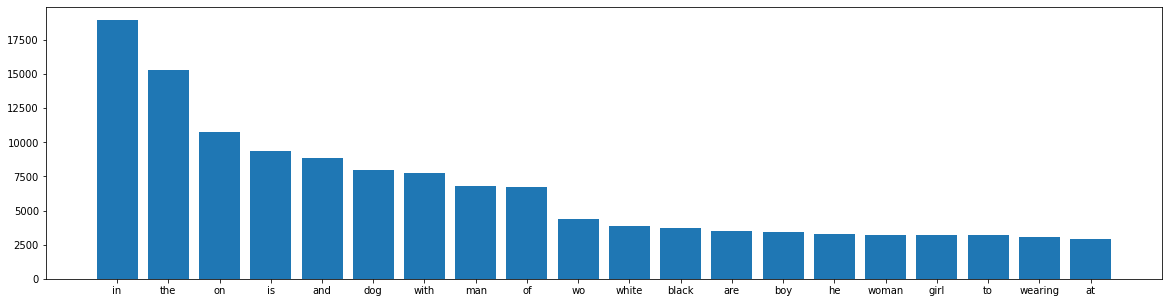

In [74]:
from collections import Counter

def to_vocabulary_save_cleaned_captions_and_plot(captions):
  cap_list = []
  for key in captions.keys():
    for j in range(5):
      cap_list.extend(captions[key][j].split())
  my_list = Counter(cap_list)
  vocab_list = [d for d in my_list.keys() if my_list[d] >= 10]
  vocab_list.append('<START>')
  vocab_list.append('<END>')
  vocabset = set(vocab_list)
  
  lines = list()
  for key in captions.keys():
    for j in range(5):
      cap_ls = captions[key][j].split()
      cap = ' '.join([word for word in cap_ls if (word in vocabset)])
      lines.append(key + ' <START> ' + cap + ' <END>')
  data = '\n'.join(lines)
  file = open('clean_captions.txt', 'w')
  file.write(data)
  file.close()
  
  # Get top 20 words by frequency.
  vals = sorted(my_list.items(),key=lambda x:x[1],reverse=True)
  words = [x[0] for x in vals[:20]]
  cnts = [x[1] for x in vals[:20]]
  plt.figure(figsize=(20,5))
  f = plt.bar(words,cnts)

  return set(vocab_list)
 
# summarize vocabulary
vocabulary = to_vocabulary_save_cleaned_captions_and_plot(image_path_to_caption)
print('Vocabulary Size = ', len(vocabulary))

In [75]:
'<START>' in vocabulary

True

In [76]:
from pickle import load

def load_captions_cleaned(filename, dataset):
  file = open(filename, 'r')
  doc = file.read()
  file.close()
  captions = dict()
  for line in doc.split('\n'):
    tokens = line.split()
    id, cap = tokens[0], tokens[1:]
    if id in dataset:
      if id not in captions:
        captions[id] = list()
        # newCap = '<START> ' + ' '.join(cap) + ' <END>'
        captions[id].append(' '.join(cap))
  return captions

# Load Train Data
filename = 'Flickr_8k.trainImages.txt'
file = open(filename, 'r')
doc = file.read()
file.close()
dataset = list()
for line in doc.split('\n'):
  # one line has len < 1
  if len(line) < 1:
    continue
  identifier = line.split('.')[0]
  dataset.append(identifier)
train = set(dataset)
print('Train Data Size =', len(train))
train_captions = load_captions_cleaned('clean_captions.txt', train)
print('Cleaned Captions Size=', len(train_captions))
print(train_captions['1000268201_693b08cb0e'])

Train Data Size = 6000
Cleaned Captions Size= 6000
['<START> child in pink dress is climbing up set of stairs in an way <END>']


In [ ]:
from os import listdir
from keras.models import Model
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.preprocessing.image import load_img, img_to_array
from pickle import dump
 
def encode(directory):
  model = VGG16()
  model = Model(inputs=model.inputs, outputs=model.layers[-2].output)
  print(model.summary())
  features = dict()
  i = 0
  j = 0
  for name in listdir(directory):
    filename = directory + '/' + name
    image = load_img(filename, target_size=(224, 224))
    image = img_to_array(image)
    dx, dy, dz = image.shape
    image = image.reshape((1, dx, dy, dz))
    image = preprocess_input(image)
    feature = model.predict(image, verbose=0)
    id = name.split('.')[0]
    features[id] = feature
    i = i + 1
    if(i > 100):
      j = j + 1
      i = 0
      print('{}%'.format(j), end=' ')
  return features
 
# extract features from all images
directory = 'Images'
features = encode(directory)
print('Number of Image = ', len(features))
# save 
dump(features, open('features.pkl', 'wb'))

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [77]:
# Load Validation Data
filename = 'Flickr_8k.devImages.txt'
file = open(filename, 'r')
doc = file.read()
file.close()
dataset = list()
for line in doc.split('\n'):
  # one line has len < 1
  if len(line) < 1:
    continue
  identifier = line.split('.')[0]
  dataset.append(identifier)
validation = set(dataset)
print('Validation Data Size =', len(validation))
validation_captions = load_captions_cleaned('clean_captions.txt', validation)
print('Validation Cleaned Captions Size=', len(validation_captions))

Validation Data Size = 1000
Validation Cleaned Captions Size= 1000


In [78]:
# Load Test Data
filename = 'Flickr_8k.testImages.txt'
file = open(filename, 'r')
doc = file.read()
file.close()
dataset = list()
for line in doc.split('\n'):
  # one line has len < 1
  if len(line) < 1:
    continue
  identifier = line.split('.')[0]
  dataset.append(identifier)
test = set(dataset)
print('Test Data Size =', len(test))
test_captions = load_captions_cleaned('clean_captions.txt', test)
print('Test Cleaned Captions Size=', len(test_captions))

Test Data Size = 1000
Test Cleaned Captions Size= 1000


In [79]:
import tensorflow as tf
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

idx2word = {}
word2idx = {}
i = 1
for w in vocabulary:
    word2idx[w] = i
    idx2word[i] = w
    i += 1

word2idx['<PAD>'] = 0
idx2word[0] = '<PAD>'
vocab_size = len(vocabulary) + 1

def to_lines(descriptions):
    all_desc = list()
    for key in descriptions.keys():
        [all_desc.append(d) for d in descriptions[key]]
    return all_desc

def data_generator(captions, Images, word2idx, maxCapSize, num_photos_per_batch):
    X1, X2, y = list(), list(), list()
    n=0
    while 1:
        for key, desc_list in captions.items():
            n+=1
            Image = np.reshape(Images[key], (len(Images[key][0]), ))
            for desc in desc_list:
                seq = [word2idx[word] for word in desc.split(' ') if word in word2idx]
                for i in range(1, len(seq)):
                    in_seq, out_seq = seq[:i], seq[i]
                    in_seq = pad_sequences([in_seq], maxlen=maxCapSize)[0]
                    out_seq = to_categorical([out_seq], num_classes=vocab_size)[0]
                    X1.append(Image)
                    X2.append(in_seq)
                    y.append(out_seq)
            if n==num_photos_per_batch:
                yield [[np.array(X1), np.array(X2)], np.array(y)]
                X1, X2, y = list(), list(), list()
                n=0

In [80]:
num_photos_per_batch = 10

all_features = load(open('features.pkl', 'rb'))

train_features = {k: all_features[k] for k in train}
valid_features = {k: all_features[k] for k in validation}
test_features = {k: all_features[k] for k in test}

batch_generator = data_generator(captions=train_captions,
                                 Images=train_features,
                                 word2idx=word2idx,
                                 maxCapSize=maxCapSize, 
                                 num_photos_per_batch=num_photos_per_batch)

inputs, outputs = next(batch_generator)

In [ ]:
!wget http://nlp.stanford.edu/data/glove.42B.300d.zip
!unzip glove.42B.300d.zip

--2022-01-16 04:41:25--  http://nlp.stanford.edu/data/glove.42B.300d.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.42B.300d.zip [following]
--2022-01-16 04:41:25--  https://nlp.stanford.edu/data/glove.42B.300d.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.42B.300d.zip [following]
--2022-01-16 04:41:26--  http://downloads.cs.stanford.edu/nlp/data/glove.42B.300d.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1877800501 (1.7G) [application/zip]
Sav

In [ ]:
import numpy as np

embeddings_index = {}
f = open('glove.42B.300d.txt')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('Found %s word vectors.' %len(embeddings_index))

Found 1917494 word vectors.


In [81]:
embedding_matrix = np.zeros((vocab_size, 300))
for word, i in word2idx.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector
        
print(embedding_matrix.shape)

(1997, 300)


Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 32)]         0           []                               
                                                                                                  
 input_5 (InputLayer)           [(None, 4096)]       0           []                               
                                                                                                  
 embedding_2 (Embedding)        (None, 32, 300)      599100      ['input_6[0][0]']                
                                                                                                  
 dropout_4 (Dropout)            (None, 4096)         0           ['input_5[0][0]']                
                                                                                            

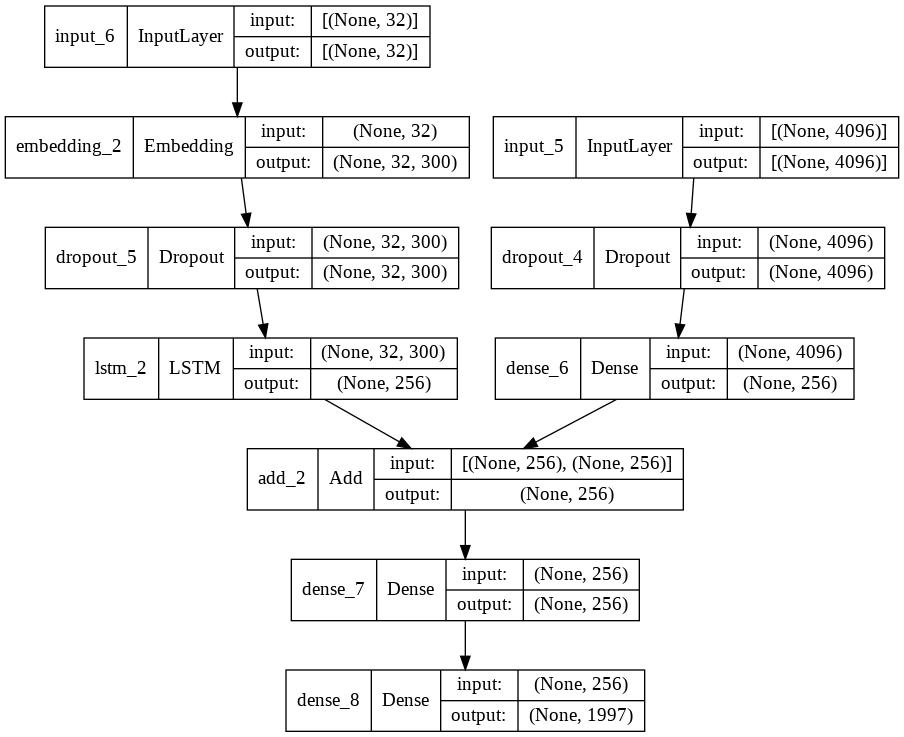

In [ ]:
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import LSTM, Dense, Input, Dropout
from keras.layers.merge import add
from keras.models import Model


inputs1 = Input(shape=(4096,))
fe1 = Dropout(0.5)(inputs1)
fe2 = Dense(256, activation='relu')(fe1)

inputs2 = Input(shape=(maxCapSize,))
se1 = tf.keras.layers.Embedding(vocab_size, 300, mask_zero=True)(inputs2)
se2 = Dropout(0.5)(se1)
se3 = LSTM(256)(se2)

decoder1 = add([fe2, se3])
decoder2 = Dense(256, activation='relu')(decoder1)
outputs = Dense(vocab_size, activation='softmax')(decoder2)
model = Model(inputs=[inputs1, inputs2], outputs=outputs)
model.layers[2].set_weights([embedding_matrix])
model.layers[2].trainable = False
model.compile(loss='categorical_crossentropy', optimizer='adam')

print(model.summary())
plot_model(model, to_file='model.png', show_shapes=True)

Training

In [ ]:
def LossAccPlot(history):
  plt.figure()
  plt.plot(history.history['loss'])
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train'], loc='upper right')
  plt.show()

  plt.figure()
  plt.plot(history.history['accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train'], loc='upper left')
  plt.show()


In [ ]:
import pandas as pd

epochs = 20
valid_accuracy = []

for i in range(epochs):
  print("run epoch ", i)
  batch_generator = data_generator(captions=train_captions,
                                  Images=train_features,
                                  word2idx=word2idx,
                                  maxCapSize=maxCapSize, 
                                  num_photos_per_batch=num_photos_per_batch)
    
  # batch_valid_generator = data_generator(captions=validation_captions,
  #                                 Images=valid_features,
  #                                 word2idx=word2idx,
  #                                 maxCapSize=maxCapSize, 
  #                                 num_photos_per_batch=num_photos_per_batch)
    
  history = model.fit_generator(batch_generator,
                    #  validation_data=batch_valid_generator,
                     epochs=1,
                     steps_per_epoch=len(train_features),
                     verbose=1)

  hist_df = pd.DataFrame(history.history) 

  hist_csv_file = 'history_' + str(i) + '.csv' 
  with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

  model.save('model' + str(i) + '.h5')
# print(np.argmax(valid_accuracy), max(valid_accuracy))

run epoch  0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


6000/6000 [==============================] - 585s 90ms/step - loss: 3.1631


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


run epoch  1
6000/6000 [==============================] - 540s 90ms/step - loss: 2.0305
run epoch  2
6000/6000 [==============================] - 541s 90ms/step - loss: 1.6338
run epoch  3
6000/6000 [==============================] - 541s 90ms/step - loss: 1.4331
run epoch  4
6000/6000 [==============================] - 536s 89ms/step - loss: 1.3022
run epoch  5
6000/6000 [==============================] - 538s 90ms/step - loss: 1.2102
run epoch  6
6000/6000 [==============================] - 537s 89ms/step - loss: 1.1419
run epoch  7
6000/6000 [==============================] - 538s 90ms/step - loss: 1.0927
run epoch  8
6000/6000 [==============================] - 536s 89ms/step - loss: 1.0529
run epoch  9
6000/6000 [==============================] - 542s 90ms/step - loss: 1.0225
run epoch  10
6000/6000 [==============================] - 538s 90ms/step - loss: 0.9986
run epoch  11
6000/6000 [==============================] - 535s 89ms/step - loss: 0.9782
run epoch  12
6000/6000 [=====

Test

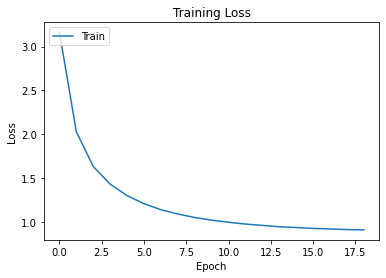

In [ ]:
epochs = 19
loss_list = []
for i in range(epochs):
  df = pd.read_csv('history_' + str(i) + '.csv' )
  loss_list.append(df['loss'][0])

plt.figure()
plt.plot(loss_list)
plt.title('Training Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

In [ ]:
def test_model(Image, model, max_length, word2idx, idx2word):
    caption = ['<START>']
    for s in range(max_length):
        seq = [word2idx[i] for i in caption]
        seq = pad_sequences([seq], maxlen=max_length)[0]
        in_put = [np.array([np.reshape(Image, (len(Image[0]), ))]), np.array([seq])]
        word = model.predict(in_put, verbose=0)
        word = np.argmax(word)
        word = idx2word[word]
        if word is None:
            break
        caption.append(word)
        if word == '<END>':
            break
    return caption

In [85]:
from keras.models import load_model

test_img = '3385593926_d3e9c21170'
loaded_model = load_model('model19.h5')
caption = test_model(Image = test_features[test_img],
                     model = loaded_model,
                     max_length = maxCapSize,
                     word2idx = word2idx,
                     idx2word = idx2word)

In [86]:
# '1107246521_d16a476380': ['<START> black dog jumping to catch rope toy <END>'],
test_captions[test_img]

['<START> he dogs are in the snow in front of fence <END>']

Text(0, 2, 'Caption Predicted: tube white hockey single treat print shops sledding scooter space kayake')

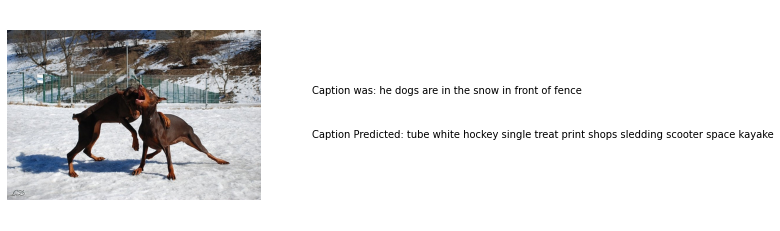

In [95]:
f, axes = plt.subplots(1, 2)
plt.axis('off')
f.set_figwidth(10)
image_num = 20
axes[0].imshow(io.imread('Images/' + test_img + '.jpg'))
axes[0].axis('off')
axes[1].set_ylim(0,5)
axes[1].text(0,3,'Caption was: ' + ''.join(test_captions[test_img][0][8:-5]))
axes[1].text(0,2,'Caption Predicted: ' + ' '.join(caption)[8:80])

Not deleting less than 10 repetition

Vocabulary Size =  8901


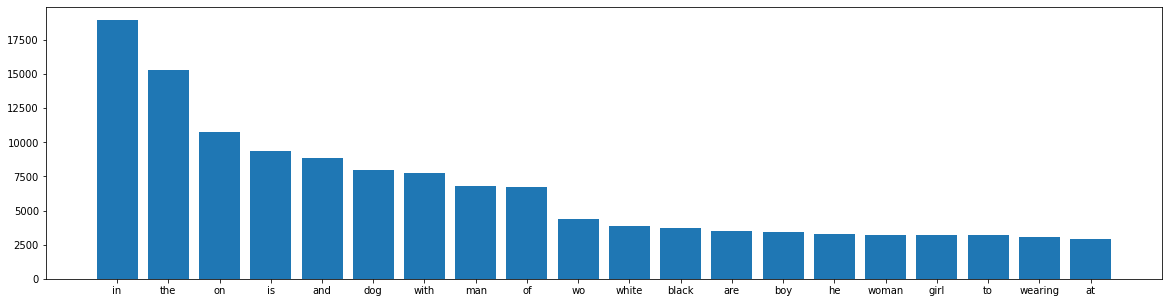

In [96]:
from collections import Counter

def to_vocabulary_save_cleaned_captions_and_plot(captions):
  cap_list = []
  for key in captions.keys():
    for j in range(5):
      cap_list.extend(captions[key][j].split())
  my_list = Counter(cap_list)
  vocab_list = [d for d in my_list.keys()]
  vocab_list.append('<START>')
  vocab_list.append('<END>')
  vocabset = set(vocab_list)
  
  lines = list()
  for key in captions.keys():
    for j in range(5):
      cap_ls = captions[key][j].split()
      cap = ' '.join([word for word in cap_ls if (word in vocabset)])
      lines.append(key + ' <START> ' + cap + ' <END>')
  data = '\n'.join(lines)
  file = open('clean_captions.txt', 'w')
  file.write(data)
  file.close()
  
  # Get top 20 words by frequency.
  vals = sorted(my_list.items(),key=lambda x:x[1],reverse=True)
  words = [x[0] for x in vals[:20]]
  cnts = [x[1] for x in vals[:20]]
  plt.figure(figsize=(20,5))
  f = plt.bar(words,cnts)

  return set(vocab_list)
 
# summarize vocabulary
vocabulary = to_vocabulary_save_cleaned_captions_and_plot(image_path_to_caption)
print('Vocabulary Size = ', len(vocabulary))

In [97]:
from pickle import load

def load_captions_cleaned(filename, dataset):
  file = open(filename, 'r')
  doc = file.read()
  file.close()
  captions = dict()
  for line in doc.split('\n'):
    tokens = line.split()
    id, cap = tokens[0], tokens[1:]
    if id in dataset:
      if id not in captions:
        captions[id] = list()
        # newCap = '<START> ' + ' '.join(cap) + ' <END>'
        captions[id].append(' '.join(cap))
  return captions

# Load Train Data
filename = 'Flickr_8k.trainImages.txt'
file = open(filename, 'r')
doc = file.read()
file.close()
dataset = list()
for line in doc.split('\n'):
  # one line has len < 1
  if len(line) < 1:
    continue
  identifier = line.split('.')[0]
  dataset.append(identifier)
train = set(dataset)
print('Train Data Size =', len(train))
train_captions = load_captions_cleaned('clean_captions.txt', train)
print('Cleaned Captions Size=', len(train_captions))
print(train_captions['1000268201_693b08cb0e'])

Train Data Size = 6000
Cleaned Captions Size= 6000
['<START> child in pink dress is climbing up set of stairs in an entry way <END>']


In [98]:
import tensorflow as tf
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

idx2word = {}
word2idx = {}
i = 1
for w in vocabulary:
    word2idx[w] = i
    idx2word[i] = w
    i += 1

word2idx['<PAD>'] = 0
idx2word[0] = '<PAD>'
vocab_size = len(vocabulary) + 1

def to_lines(descriptions):
    all_desc = list()
    for key in descriptions.keys():
        [all_desc.append(d) for d in descriptions[key]]
    return all_desc

def data_generator(captions, Images, word2idx, maxCapSize, num_photos_per_batch):
    X1, X2, y = list(), list(), list()
    n=0
    while 1:
        for key, desc_list in captions.items():
            n+=1
            Image = np.reshape(Images[key], (len(Images[key][0]), ))
            for desc in desc_list:
                seq = [word2idx[word] for word in desc.split(' ') if word in word2idx]
                for i in range(1, len(seq)):
                    in_seq, out_seq = seq[:i], seq[i]
                    in_seq = pad_sequences([in_seq], maxlen=maxCapSize)[0]
                    out_seq = to_categorical([out_seq], num_classes=vocab_size)[0]
                    X1.append(Image)
                    X2.append(in_seq)
                    y.append(out_seq)
            if n==num_photos_per_batch:
                yield [[np.array(X1), np.array(X2)], np.array(y)]
                X1, X2, y = list(), list(), list()
                n=0

In [99]:
embedding_matrix = np.zeros((vocab_size, 300))
for word, i in word2idx.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector
        
print(embedding_matrix.shape)

(8902, 300)


Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 32)]         0           []                               
                                                                                                  
 input_6 (InputLayer)           [(None, 4096)]       0           []                               
                                                                                                  
 embedding_2 (Embedding)        (None, 32, 300)      2670600     ['input_7[0][0]']                
                                                                                                  
 dropout_4 (Dropout)            (None, 4096)         0           ['input_6[0][0]']                
                                                                                            

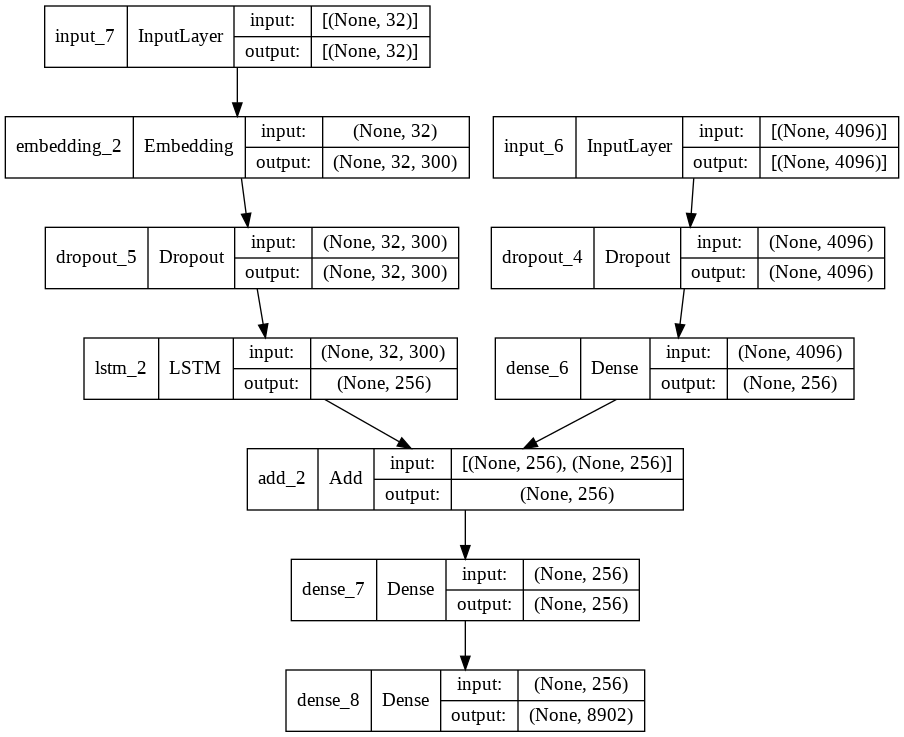

In [100]:
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import LSTM, Dense, Input, Dropout
from keras.layers.merge import add
from keras.models import Model


inputs1 = Input(shape=(4096,))
fe1 = Dropout(0.5)(inputs1)
fe2 = Dense(256, activation='relu')(fe1)

inputs2 = Input(shape=(maxCapSize,))
se1 = tf.keras.layers.Embedding(vocab_size, 300, mask_zero=True)(inputs2)
se2 = Dropout(0.5)(se1)
se3 = LSTM(256)(se2)

decoder1 = add([fe2, se3])
decoder2 = Dense(256, activation='relu')(decoder1)
outputs = Dense(vocab_size, activation='softmax')(decoder2)
model = Model(inputs=[inputs1, inputs2], outputs=outputs)
model.layers[2].set_weights([embedding_matrix])
model.layers[2].trainable = False
model.compile(loss='categorical_crossentropy', optimizer='adam')

print(model.summary())
plot_model(model, to_file='model.png', show_shapes=True)

In [ ]:
import pandas as pd

epochs = 20
valid_accuracy = []

for i in range(epochs):
  print("run epoch ", i)
  batch_generator = data_generator(captions=train_captions,
                                  Images=train_features,
                                  word2idx=word2idx,
                                  maxCapSize=maxCapSize, 
                                  num_photos_per_batch=num_photos_per_batch)
    
  # batch_valid_generator = data_generator(captions=validation_captions,
  #                                 Images=valid_features,
  #                                 word2idx=word2idx,
  #                                 maxCapSize=maxCapSize, 
  #                                 num_photos_per_batch=num_photos_per_batch)
    
  history = model.fit_generator(batch_generator,
                    #  validation_data=batch_valid_generator,
                     epochs=1,
                     steps_per_epoch=len(train_features),
                     verbose=1)

  hist_df = pd.DataFrame(history.history) 

  hist_csv_file = 'history2_' + str(i) + '.csv' 
  with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

  model.save('model2_' + str(i) + '.h5')
# print(np.argmax(valid_accuracy), max(valid_accuracy))

run epoch  0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


6000/6000 [==============================] - 559s 93ms/step - loss: 3.4250


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


run epoch  1
6000/6000 [==============================] - 557s 93ms/step - loss: 2.1527
run epoch  2
6000/6000 [==============================] - 560s 93ms/step - loss: 1.7475
run epoch  3
6000/6000 [==============================] - 568s 95ms/step - loss: 1.5350
run epoch  4
6000/6000 [==============================] - 559s 93ms/step - loss: 1.3987
run epoch  5
6000/6000 [==============================] - 560s 93ms/step - loss: 1.2961
run epoch  6
6000/6000 [==============================] - 558s 93ms/step - loss: 1.2173
run epoch  7
6000/6000 [==============================] - 559s 93ms/step - loss: 1.1605
run epoch  8
6000/6000 [==============================] - 555s 92ms/step - loss: 1.1194
run epoch  9
6000/6000 [==============================] - 558s 93ms/step - loss: 1.0885
run epoch  10
6000/6000 [==============================] - 558s 93ms/step - loss: 1.0617
run epoch  11
6000/6000 [==============================] - 550s 92ms/step - loss: 1.0383
run epoch  12
6000/6000 [=====

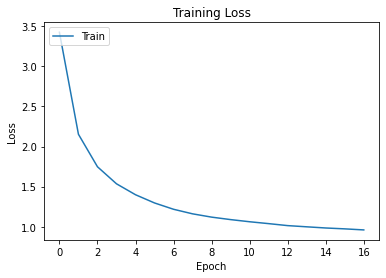

In [ ]:
loss_list = []
epochs = 17
for i in range(epochs):
  df = pd.read_csv('history2_' + str(i) + '.csv' )
  loss_list.append(df['loss'][0])

plt.figure()
plt.plot(loss_list)
plt.title('Training Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

Text(0, 2, 'Caption Predicted: advertisement flare facility shark dimpled clifftop exercises cork phone clifftop pans cork ')

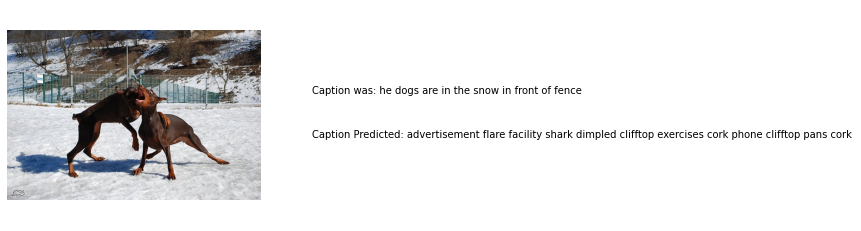

In [102]:
from keras.models import load_model

# test_img = '2654514044_a70a6e2c21'
loaded_model2 = load_model('model2_16.h5')
caption2 = test_model(Image = test_features1[test_img],
                     model = loaded_model2,
                     max_length = maxCapSize,
                     word2idx = word2idx,
                     idx2word = idx2word)
f, axes = plt.subplots(1, 2)
plt.axis('off')
f.set_figwidth(10)
image_num = 20
axes[0].imshow(io.imread('Images/' + test_img + '.jpg'))
axes[0].axis('off')
axes[1].set_ylim(0,5)
axes[1].text(0,3,'Caption was: ' + ''.join(test_captions[test_img][0][8:-5]))
axes[1].text(0,2,'Caption Predicted: ' + ' '.join(caption2)[8:100])

Using Inception V3

In [17]:
from os import listdir
from keras.models import Model
from keras.applications.inception_v3 import InceptionV3, preprocess_input
from keras.preprocessing.image import load_img, img_to_array
from pickle import dump
 
def encode(directory):
  model_inceptionv3 = InceptionV3(weights='imagenet')
  model_inceptionv3 = Model(model_inceptionv3.input, model_inceptionv3.layers[-2].output)
  print(model_inceptionv3.summary())
  features = dict()
  i = 0
  j = 0
  for name in listdir(directory):
    filename = directory + '/' + name
    image = load_img(filename, target_size=(299, 299))
    image = img_to_array(image)
    dx, dy, dz = image.shape
    image = image.reshape((1, dx, dy, dz))
    image = preprocess_input(image)
    feature = model_inceptionv3.predict(image, verbose=0)
    id = name.split('.')[0]
    features[id] = feature
    i = i + 1
    if(i > 100):
      j = j + 1
      i = 0
      print('{}%'.format(j), end=' ')
  return features
 
# extract features from all images
directory = 'Images'
features = encode(directory)
print('Number of Image = ', len(features))
# save 
dump(features, open('features_inceptionv3.pkl', 'wb'))

96124928/96112376 [==============================] - 0s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 149, 149, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 149, 149, 32  96         ['conv2d[0][0]']                 
 alization)                  

In [18]:
# Load Validation Data
filename = 'Flickr_8k.devImages.txt'
file = open(filename, 'r')
doc = file.read()
file.close()
dataset = list()
for line in doc.split('\n'):
  # one line has len < 1
  if len(line) < 1:
    continue
  identifier = line.split('.')[0]
  dataset.append(identifier)
validation = set(dataset)
print('Validation Data Size =', len(validation))
validation_captions = load_captions_cleaned('clean_captions.txt', validation)
print('Validation Cleaned Captions Size=', len(validation_captions))

Validation Data Size = 1000
Validation Cleaned Captions Size= 1000


In [19]:
# Load Test Data
filename = 'Flickr_8k.testImages.txt'
file = open(filename, 'r')
doc = file.read()
file.close()
dataset = list()
for line in doc.split('\n'):
  # one line has len < 1
  if len(line) < 1:
    continue
  identifier = line.split('.')[0]
  dataset.append(identifier)
test = set(dataset)
print('Test Data Size =', len(test))
test_captions = load_captions_cleaned('clean_captions.txt', test)
print('Test Cleaned Captions Size=', len(test_captions))

Test Data Size = 1000
Test Cleaned Captions Size= 1000


In [20]:
import tensorflow as tf
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

idx2word = {}
word2idx = {}
i = 1
for w in vocabulary:
    word2idx[w] = i
    idx2word[i] = w
    i += 1

word2idx['<PAD>'] = 0
idx2word[0] = '<PAD>'
vocab_size = len(vocabulary) + 1

def to_lines(descriptions):
    all_desc = list()
    for key in descriptions.keys():
        [all_desc.append(d) for d in descriptions[key]]
    return all_desc

def data_generator(captions, Images, word2idx, maxCapSize, num_photos_per_batch):
    X1, X2, y = list(), list(), list()
    n=0
    while 1:
        for key, desc_list in captions.items():
            n+=1
            Image = np.reshape(Images[key], (len(Images[key][0]), ))
            for desc in desc_list:
                seq = [word2idx[word] for word in desc.split(' ') if word in word2idx]
                for i in range(1, len(seq)):
                    in_seq, out_seq = seq[:i], seq[i]
                    in_seq = pad_sequences([in_seq], maxlen=maxCapSize)[0]
                    out_seq = to_categorical([out_seq], num_classes=vocab_size)[0]
                    X1.append(Image)
                    X2.append(in_seq)
                    y.append(out_seq)
            if n==num_photos_per_batch:
                yield [[np.array(X1), np.array(X2)], np.array(y)]
                X1, X2, y = list(), list(), list()
                n=0

In [23]:
!wget http://nlp.stanford.edu/data/glove.42B.300d.zip
!unzip glove.42B.300d.zip

--2022-01-16 15:35:47--  http://nlp.stanford.edu/data/glove.42B.300d.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.42B.300d.zip [following]
--2022-01-16 15:35:47--  https://nlp.stanford.edu/data/glove.42B.300d.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.42B.300d.zip [following]
--2022-01-16 15:35:47--  http://downloads.cs.stanford.edu/nlp/data/glove.42B.300d.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1877800501 (1.7G) [application/zip]
Sav

In [24]:
import numpy as np

embeddings_index = {}
f = open('glove.42B.300d.txt')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('Found %s word vectors.' %len(embeddings_index))

Found 1917494 word vectors.


In [25]:
embedding_matrix = np.zeros((vocab_size, 300))
for word, i in word2idx.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector
        
print(embedding_matrix.shape)

(1997, 300)


Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 32)]         0           []                               
                                                                                                  
 input_4 (InputLayer)           [(None, 2048)]       0           []                               
                                                                                                  
 embedding_1 (Embedding)        (None, 32, 300)      599100      ['input_5[0][0]']                
                                                                                                  
 dropout_2 (Dropout)            (None, 2048)         0           ['input_4[0][0]']                
                                                                                            

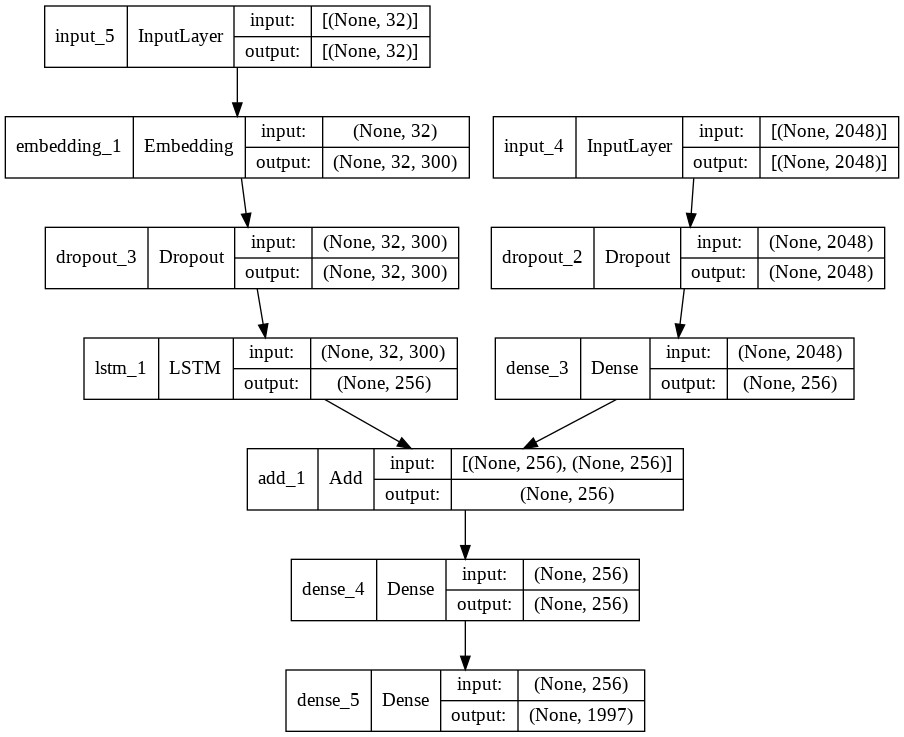

In [28]:
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import LSTM, Dense, Input, Dropout
from keras.layers.merge import add
from keras.models import Model


inputs1 = Input(shape=(2048,))
fe1 = Dropout(0.5)(inputs1)
fe2 = Dense(256, activation='relu')(fe1)

inputs2 = Input(shape=(maxCapSize,))
se1 = tf.keras.layers.Embedding(vocab_size, 300, mask_zero=True)(inputs2)
se2 = Dropout(0.5)(se1)
se3 = LSTM(256)(se2)

decoder1 = add([fe2, se3])
decoder2 = Dense(256, activation='relu')(decoder1)
outputs = Dense(vocab_size, activation='softmax')(decoder2)
model = Model(inputs=[inputs1, inputs2], outputs=outputs)
model.layers[2].set_weights([embedding_matrix])
model.layers[2].trainable = False
model.compile(loss='categorical_crossentropy', optimizer='adam')

print(model.summary())
plot_model(model, to_file='model.png', show_shapes=True)

In [29]:
import pandas as pd

epochs = 15
valid_accuracy = []

for i in range(epochs):
  print("run epoch ", i)
  batch_generator = data_generator(captions=train_captions,
                                  Images=train_features,
                                  word2idx=word2idx,
                                  maxCapSize=maxCapSize, 
                                  num_photos_per_batch=num_photos_per_batch)
    
  # batch_valid_generator = data_generator(captions=validation_captions,
  #                                 Images=valid_features,
  #                                 word2idx=word2idx,
  #                                 maxCapSize=maxCapSize, 
  #                                 num_photos_per_batch=num_photos_per_batch)
    
  history = model.fit_generator(batch_generator,
                    #  validation_data=batch_valid_generator,
                     epochs=1,
                     steps_per_epoch=len(train_features),
                     verbose=1)

  hist_df = pd.DataFrame(history.history) 

  hist_csv_file = 'history3_' + str(i) + '.csv' 
  with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

  model.save('model3_' + str(i) + '.h5')
# print(np.argmax(valid_accuracy), max(valid_accuracy))

run epoch  0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


6000/6000 [==============================] - 610s 101ms/step - loss: 3.1251


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


run epoch  1
6000/6000 [==============================] - 602s 100ms/step - loss: 2.0117
run epoch  2
6000/6000 [==============================] - 599s 100ms/step - loss: 1.6041
run epoch  3
6000/6000 [==============================] - 602s 100ms/step - loss: 1.3819
run epoch  4
6000/6000 [==============================] - 574s 96ms/step - loss: 1.2578
run epoch  5
6000/6000 [==============================] - 606s 101ms/step - loss: 1.1769
run epoch  6
6000/6000 [==============================] - 609s 101ms/step - loss: 1.1016
run epoch  7
6000/6000 [==============================] - 610s 102ms/step - loss: 1.0442
run epoch  8
6000/6000 [==============================] - 608s 101ms/step - loss: 1.0050
run epoch  9
6000/6000 [==============================] - 609s 101ms/step - loss: 0.9838
run epoch  10
6000/6000 [==============================] - 611s 102ms/step - loss: 0.9519
run epoch  11
6000/6000 [==============================] - 613s 102ms/step - loss: 0.9268
run epoch  12
6000/6

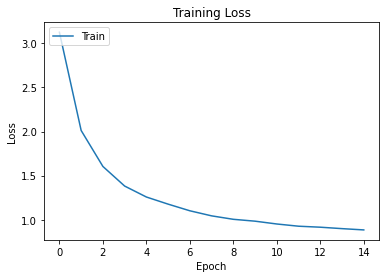

In [30]:
loss_list = []
epochs = 15
for i in range(epochs):
  df = pd.read_csv('history3_' + str(i) + '.csv' )
  loss_list.append(df['loss'][0])

plt.figure()
plt.plot(loss_list)
plt.title('Training Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

In [34]:
def test_model(Image, model, max_length, word2idx, idx2word):
    caption = ['<START>']
    for s in range(max_length):
        seq = [word2idx[i] for i in caption]
        seq = pad_sequences([seq], maxlen=max_length)[0]
        in_put = [np.array([np.reshape(Image, (len(Image[0]), ))]), np.array([seq])]
        word = model.predict(in_put, verbose=0)
        word = np.argmax(word)
        word = idx2word[word]
        if word is None:
            break
        caption.append(word)
        if word == '<END>':
            break
    return caption

## See Outputs Together

In [47]:
num_photos_per_batch = 10

all_features1 = load(open('features.pkl', 'rb'))

train_features1 = {k: all_features1[k] for k in train}
valid_features1 = {k: all_features1[k] for k in validation}
test_features1 = {k: all_features1[k] for k in test}

batch_generator = data_generator(captions=train_captions,
                                 Images=train_features1,
                                 word2idx=word2idx,
                                 maxCapSize=maxCapSize, 
                                 num_photos_per_batch=num_photos_per_batch)

inputs, outputs = next(batch_generator)

In [48]:
num_photos_per_batch = 10

all_features2 = load(open('features_inceptionv3.pkl', 'rb'))

train_features2 = {k: all_features2[k] for k in train}
valid_features2 = {k: all_features2[k] for k in validation}
test_features2 = {k: all_features2[k] for k in test}

batch_generator = data_generator(captions=train_captions,
                                 Images=train_features2,
                                 word2idx=word2idx,
                                 maxCapSize=maxCapSize, 
                                 num_photos_per_batch=num_photos_per_batch)

inputs, outputs = next(batch_generator)

Text(0, 2, 'Caption Predicted: tube white hockey single treat print shops sledding scooter space kayaker')

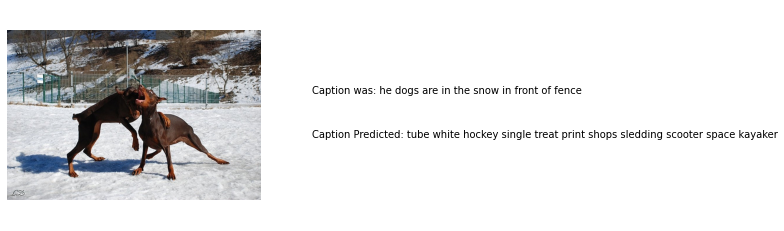

In [69]:
from keras.models import load_model

test_img = '3385593926_d3e9c21170'
loaded_model1 = load_model('model19.h5')
caption1 = test_model(Image = test_features1[test_img],
                     model = loaded_model1,
                     max_length = maxCapSize,
                     word2idx = word2idx,
                     idx2word = idx2word)

f, axes = plt.subplots(1, 2)
plt.axis('off')
f.set_figwidth(10)
image_num = 20
axes[0].imshow(io.imread('Images/' + test_img + '.jpg'))
axes[0].axis('off')
axes[1].set_ylim(0,5)
axes[1].text(0,3,'Caption was: ' + ''.join(test_captions[test_img][0][8:-5]))
axes[1].text(0,2,'Caption Predicted: ' + ' '.join(caption1)[8:81])

Text(0, 2, 'Caption Predicted: brown dog is running across snow ')

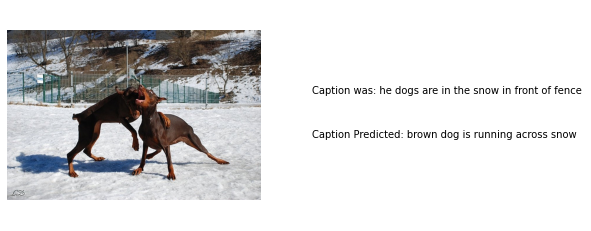

In [64]:
from keras.models import load_model

# test_img = '2654514044_a70a6e2c21'
loaded_model3 = load_model('model3_14.h5')
caption3 = test_model(Image = test_features2[test_img],
                     model = loaded_model3,
                     max_length = maxCapSize,
                     word2idx = word2idx,
                     idx2word = idx2word)
f, axes = plt.subplots(1, 2)
plt.axis('off')
f.set_figwidth(10)
image_num = 20
axes[0].imshow(io.imread('Images/' + test_img + '.jpg'))
axes[0].axis('off')
axes[1].set_ylim(0,5)
axes[1].text(0,3,'Caption was: ' + ''.join(test_captions[test_img][0][8:-5]))
axes[1].text(0,2,'Caption Predicted: ' + ' '.join(caption3)[8:-5])